# DLMIR Lab 2.1 Boolean Logic: XOR 

Let's revisit a classic example called the XOR Problem to appreciate the powerfulness of neural networks for learning complex patterns. 
The XOR (Exclusive Or) function  $x \oplus y$ is a logical operation that outputs true only when inputs are different.
Examples:
* 1 XOR 1 = 0
* 1 XOR 0 = 1
* 0 XOR 1 = 1
* 0 XOR 0 = 0

Marvin Minsky and Seymour Papert have proved that a single layer perceptions couldn't correctly classify the XOR function (Perceptrons, 1969). 
A single linear classifier cannot represent the XOR function means that there is no way for us to draw a single line that can separate the red and magenta (square) points from the blue and cyan (circle) points.

Let's start with generating some points $(x,y)$ in the space.
We add Gaussian noise to better illustrate the points, we perform our analysis as if all points were truly boolean variables
*Gaussian noise is added to make the point clouds more illustrative; We perform our analysis as if all points were $(x,y) \in \{0,1\}^2$.

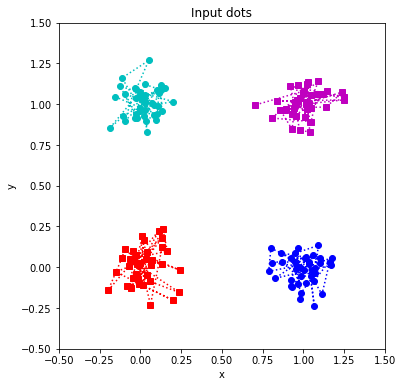

In [15]:
from numpy import *
from matplotlib.pyplot import *
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

%matplotlib inline

npts = 4 * 40; np.random.seed(10)
x = random.randn(npts)*0.1 + array([i & 1 for i in range(npts)])
y = random.randn(npts)*0.1 + array([(i & 2) >> 1 for i in range(npts)])
data = vstack([x,y])

# define color: red, blue, cyan, magenta
colors = 'rbcm'
# define class: s for square, o for circle
markers = 'soos'
# plotting function for 2d data
def plot_dots(data):
    for i in range(4):
        idx = (arange(npts) % 4 == i)
        plot(data[0,idx], data[1,idx], marker=markers[i], linestyle=':',
             color=colors[i])
    gca().set_aspect('equal')

# plotting function for 1d data (will be used later)
def show_pts_1d(data):
    for i in range(4):
        idx = (arange(npts) % 4 == i)
        plot(data[idx], marker=markers[i], linestyle='-',
             color=colors[i], alpha=0.5)
    gca().set_aspect(npts/4.0)

# plot the data
figure(figsize=(6,6))
plot_dots(data)
ylim(-0.5, 1.5)
xlim(-0.5, 1.5)
xlabel("x"); ylabel("y"); title("Input dots")

Can we draw a straight line to seperate the squares (red and magenta dots) and the circles (blue and cyan)?



---

Probably not!
However, you will learn that, a two-layer neural network can separate the pattern easily.

We define:

$$ h = \sigma(z\cdot(Wx + b_1)) $$
$$ p = \sigma(z\cdot(Uh + b_2)) $$

where $W \in \mathbb{R}^{2\times2}$ and $U \in \mathbb{R}^{2}$, and $\sigma$ is a sigmoid function.

First, let's write a sigmoid function in python. $$\sigma = \frac{1}{1+e^{-x}}$$

In [10]:
#### Your Code Here ####
def sigmoid(x):
    return 
#### End Your code here #### 

Question: We know that $$ h = \sigma(z\cdot(Wx + b_1)) $$
what is $z$ controlling?

You may discover that by plugging in different numbers of z and plot them.

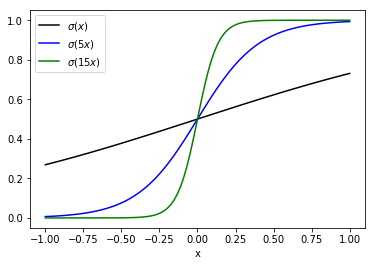

In [11]:
x = np.linspace(-1, 1, 100); figure(figsize=(6,4))
plot(x, sigmoid(x), 'k', label="$\sigma(x)$"); 
plot(x, sigmoid(5*x), 'b', label="$\sigma(5x)$");
plot(x, sigmoid(15*x), 'g', label="$\sigma(15x)$");
legend(loc='upper left'); xlabel('x');

In the area below, enter values for $W$, $b_1$, $U$, and $b_2$.
$$ h = \sigma(z\cdot(Wx + b_1)) $$
$$ p = \sigma(z\cdot(Uh + b_2)) $$

where $W \in \mathbb{R}^{2\times2}$ and $U \in \mathbb{R}^{2}$. 


In your code, you may set up a variable $$m = (Wx + b_1)$$

In [25]:
#### Replace with numbers, and play around with the numbers ####
# W = array([[w11, w12],[w21, w22]])
# b1 = array([[b11], [b12])
# U=np.array([u1,u2])
# b2 = some_number
# z = some_number


#### Feed-forward Computation, Calculate h and p ####
#### Enter Your code here #### 
# m = 
# h = 
# p = 
#### End Your code here #### 

After you're done, let's plot the hidden layer!
Can you seperate those out? (There are multiple ways of seperating)

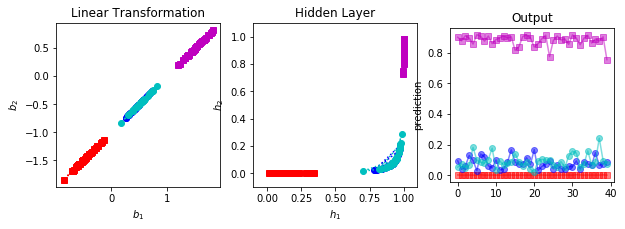

In [24]:
# After you're done, let's plot the linear transformation and the hidden layer!
# Can you seperate those out?
# Plot predictions

figure(figsize=(10,10))
# Let's plot the hidden layer!
subplot(1,3,1); plot_dots(m)
title("Linear Transformation"); xlabel("$b_1$"); ylabel("$b_2$")

# Plot hidden layer
subplot(1,3,2); plot_dots(h)
title("Hidden Layer"); xlabel("$h_1$"); ylabel("$h_2$")
ylim(-0.1, 1.1); xlim(-0.1, 1.1)

subplot(1,3,3); show_pts_1d(p)
title("Output"); ylabel("prediction")
